In [1]:
from ktc.model import *
from ktc.data_reader import *
import matplotlib.pyplot as plt

In [2]:
fileName = "data/TrainingData/data4.mat"
matdict_ref = sp.io.loadmat("data/TrainingData/ref.mat")
matdict = sp.io.loadmat(fileName)
data = DataReader(matdict)
ref = DataReader(matdict_ref)

In [3]:
background_conductivity = 0.8
electrode_count = 32
impedance = np.full(electrode_count, 1e-6)
radius = 1

mesh, subdomains = create_disk_mesh(radius, electrode_count, polygons=200, fineness=50)
forward_model = FenicsForwardModel(mesh, subdomains, electrode_count, impedance, background_conductivity)

0.13610051865742134
0.09791122542779607
0.23810972334668912
0.18030688114296156


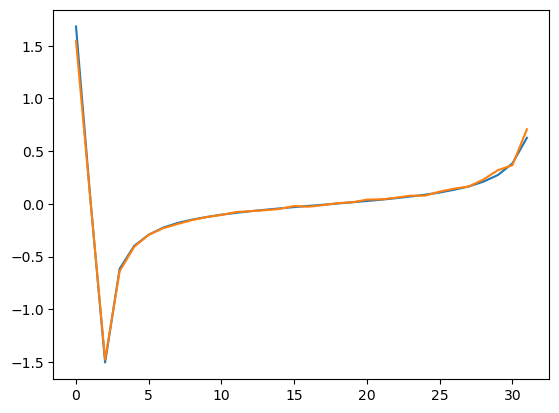

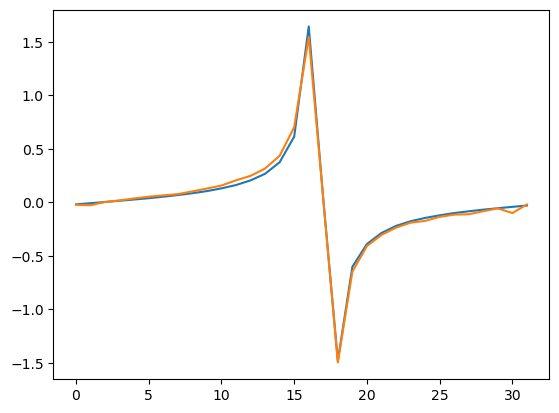

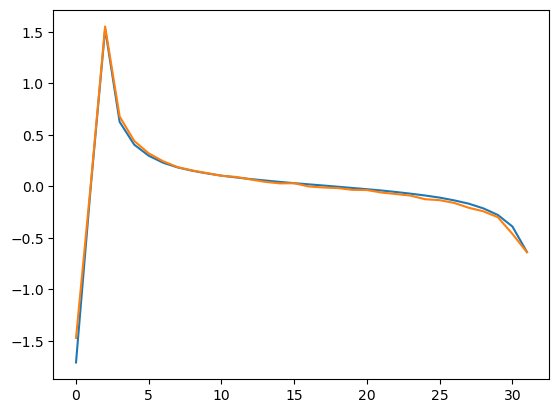

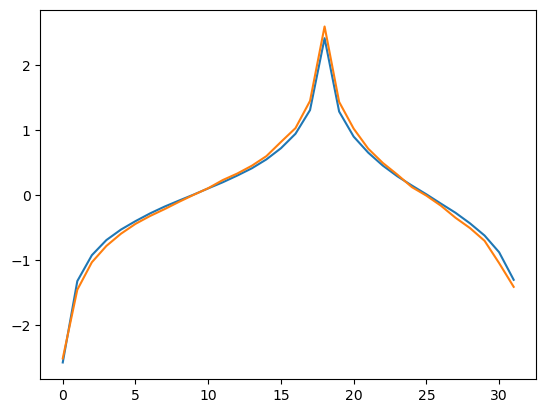

In [4]:
for inject in np.arange(0,32,8):
    u, U = forward_model.solve_forward(data.current_injections[inject])
    plt.figure()
    plt.plot(U)
    plt.plot(ref.voltages[inject])
    print(np.max(np.abs(U-ref.voltages[inject])))